# Описательная статистика in R. Пример 1
## Количественный тип данных
**Задание.** В таблице представлены данные *Уровень глюкозы* в крови и *масса тела*.
1. Вычислить среднее, медиану, моду
2. Вычислить дисперсию в выборках (вычислить размах и стандартное отклонение). Вычислить стандартную ошибку среднего
3. Проверить подчиняются ли выборки нормальному закону распределения
4. Вычислить доверительные интервалы для средних значений выборок и дать интерпретацию результатов

Уровень глюкозы|Масса тела
-|-
4|70
6|72
6|90
2|80
2|102
4|92
5|94
4|81
4|78
6|84
6|100
7|90
7|93
3|83
3|81
3|72
3|69
2|72
2|68
2|120
4|108
3|97
3|82
2|93

### 1.	Определение типа переменных
Т.к. обе величины являются физической величиной, то спектр их значений является бесконечным. Следовательно, обе переменные относятся к количественному типу данных

### 2.	Ввод данных в R

In [1]:
Input = ("Уровень глюкозы	Масса тела
4	70
6	72
6	90
2	80
2	102
4	92
5	94
4	81
4	78
6	84
6	100
7	90
7	93
3	83
3	81
3	72
3	69
2	72
2	68
2	120
4	108
3	97
3	82
2	93")
DF = as.data.frame(read.table(textConnection(Input), header = TRUE, sep = "\t"))

Команда выше позволяет работать с данными, собранными в один объект типа data.frame. Для получения доступа к конкретной переменной в data.frame используйте символ `$`. Например, для получения *Уровня глюкозы* необходимо выполнить команду `DF$Уровень.глюкозы`

Альтернативным методом создания data.frame является создание вектор-столбцов из соответствующих рядов данных:

`глюкоза <- c(4,6,6,2,2,4,5,4,4,6,6,7,7,3,3,3,3,2,2,2,4,3,3,2)`

`масса_тела <- c(70,72,90,80,102,92,94,81,78,84,100,90,93,83,81,72,69,72,68,120,108,97,82,93)`

`DF = data.frame(Уровень.глюкозы = глюкоза, Масса.тела = масса_тела)`

### 2.	Вычислить среднее, медиану, моду
Для получения *среднего* необходимо использовать команду `mean`


In [2]:
mean(DF$Уровень.глюкозы)

[1] 3.875

In [3]:
mean(DF$Масса.тела)

[1] 86.29167

*Медиана* может быть вычислена с помощью команды `median`

In [4]:
median(DF$Уровень.глюкозы)

[1] 3.5

In [5]:
median(DF$Масса.тела)

[1] 83.5

*Мода* может быть получена двумя способами:
- с помощью комманды `table`
- с помощью комманды `Mode` из библиотеки `DescTools`

In [6]:
table(DF$Уровень.глюкозы)


2 3 4 5 6 7 
6 6 5 1 4 2 

Можно видеть, что есть два значения, встречающиеся с максимальной частотой 6. Это значит, что у переменной *Уровень глюкозы* 2 моды: 2, 3

In [7]:
library(DescTools)	# Эту команду можно исполнить один раз для подключения нужных функций

In [8]:
Mode(DF$Уровень.глюкозы)

[1] 2 3
attr(,"freq")
[1] 6

Как видите, мы получили точно такой же результат с помощью другой функции. Получение мод(ы) для переменной *Масса тела* оставим читателю (Вам).

### 3.	Вычисление размаха, стандартного отклонения, дисперсии, стандартной ошибки среднего
*Размах* вычисляется как разность максимального (max) и минимального значения (min) переменной

In [9]:
max(DF$Уровень.глюкозы) - min(DF$Уровень.глюкозы)

[1] 5

Альтернативным методом вычисления *размаха* случайной величины является функция `Range` из библиотеки `DescTools`.

In [10]:
Range(DF$Уровень.глюкозы)

[1] 5
attr(,"bounds")
[1] 2 7

*Стандартное отклонение* вычисляется с помощью функции `sd`

In [11]:
sd(DF$Уровень.глюкозы)

[1] 1.676241

In [12]:
sd(DF$Масса.тела)

[1] 13.31387

*Дисперсия* может быть вычислена с помощью функции `var`

In [13]:
var(DF$Уровень.глюкозы)

[1] 2.809783

In [14]:
var(DF$Масса.тела)

[1] 177.2591

*Стандартная ошибка среднего* может быть получена двумя способами:
1.	Вручную, используя в выражении функции вычисления стандартного отклонения `sd`, квадратного корня `sqrt`, размера выборки `length`

In [15]:
sd(DF$Уровень.глюкозы) / sqrt(length(DF$Уровень.глюкозы))

[1] 0.3421612

2.	Воспользовавшись функцией `MeanSE` из библиотеки `DescTools`

In [16]:
DescTools::MeanSE(DF$Уровень.глюкозы)

[1] 0.3421612

The way the `MeanSE` function is being called in this example is just another way of telling `R` that you wish to use specific function from the specific library. But it’s not mandatory and you could safely use the short form: `MeanSE(DF$Glucose.level)` and it would still provide you with the correct result.

In [17]:
MeanSE(DF$Уровень.глюкозы)

[1] 0.3421612

### 4.	Вычисление доверительного интервала среднего, доверительного интервала медианы
*Доверительный интервал среднего* может быть вычислен двумя методами:
1. С помощью t-теста для одной выборки

In [18]:
t.test(DF$Масса.тела)$conf.int

[1] 80.66971 91.91362
attr(,"conf.level")
[1] 0.95

Нижняя граница доверительного интервала среднего - это первое значение (80,67 в данном примере). Верхняя граница доверительного интервала среднего - это второе значение (91,91 в данном примере). Уровень достоверности - 95% (0,95)

2.	С помощью функции `MeanCI` из библиотеки `DescTools`

In [19]:
MeanCI(DF$Масса.тела)

mean   lwr.ci   upr.ci 
86.29167 80.66971 91.91362

`lwr.ci` - нижняя (левая) граница *доверительного интервала среднего*

`upr.ci` - верхняя (правая) граница *доверительного интервала среднего*

Уровень достоверности *доверительного интервала* по-умолчанию для функции `MeanCI` равен 95% (0,95)

*Доверительный интервал медианы* может быть получен с помощью функции `MedianCI` из библиотеки `DescTools`

In [20]:
MedianCI(DF$Уровень.глюкозы)

median lwr.ci upr.ci 
   3.5    3.0    5.0 
attr(,"conf.level")
[1] 0.9773442

`lwr.ci` - нижняя (левая) граница *доверительного интервала медианы*.

`upr.ci` - верхняя (правая) граница *доверительного интервала медианы*

Уровень достоверности *доверительного интервала* по-умолчанию для функции `MedianCI` равен 95% (0,95).

### 5.	Проверка выборки на нормальный закон распределения
Чтобы проверить подчиняется ли выборка нормальному закону распределения необходимо использовать тест Шапиро-Уилка, реализованный функцией `shapiro.test`. Если выборка подчиняется нормальному закону распределения, то тест Шапиро-Уилка выдаст `p-value` выше *уровня значимости* 0,05. В противном случае в выборке действует отличный от нормального закон распределения случайной величины

In [21]:
shapiro.test(DF$Уровень.глюкозы)


	Shapiro-Wilk normality test

data:  DF$Уровень.глюкозы
W = 0.87708, p-value = 0.007263


Как видим, случайная величина *Уровень глюкозы* не подчиняется нормальному закону распределения, т.к. её `p-value` ниже *уровня значимости* в 0,05. Мы можем подтвердить этот вывод построив гистограмму случайной величины. Для этого нам понадобится функция `hist`. Результат работы функции показан на изображении ниже.

`hist(DF$Уровень.глюкозы, main = "Уровень глюкозы", xlab = "Value")`

`main = “Уровень глюкозы”` – заголовок графика гистограммы

`xlab = “Value”` – подпись горизонтальной оси

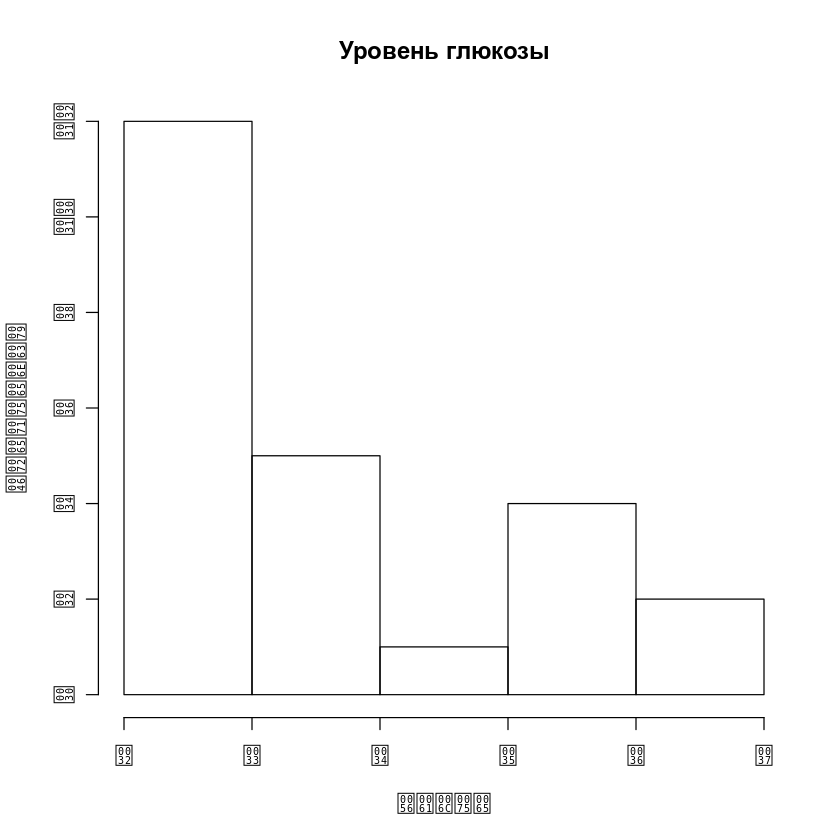

In [22]:
hist(DF$Уровень.глюкозы, main = "Уровень глюкозы", xlab = "Value")

Для *Массы тела* выходит противоположная картина

In [23]:
shapiro.test(DF$Масса.тела)


	Shapiro-Wilk normality test

data:  DF$Масса.тела
W = 0.95007, p-value = 0.2719


`p-value` *Массы тела* превышает *уровень значимости* в 0,05. Это нам говорит о том, что случайная величина *Масса тела* подчиняется нормальному закону распределения. Гистограмма представлена ниже

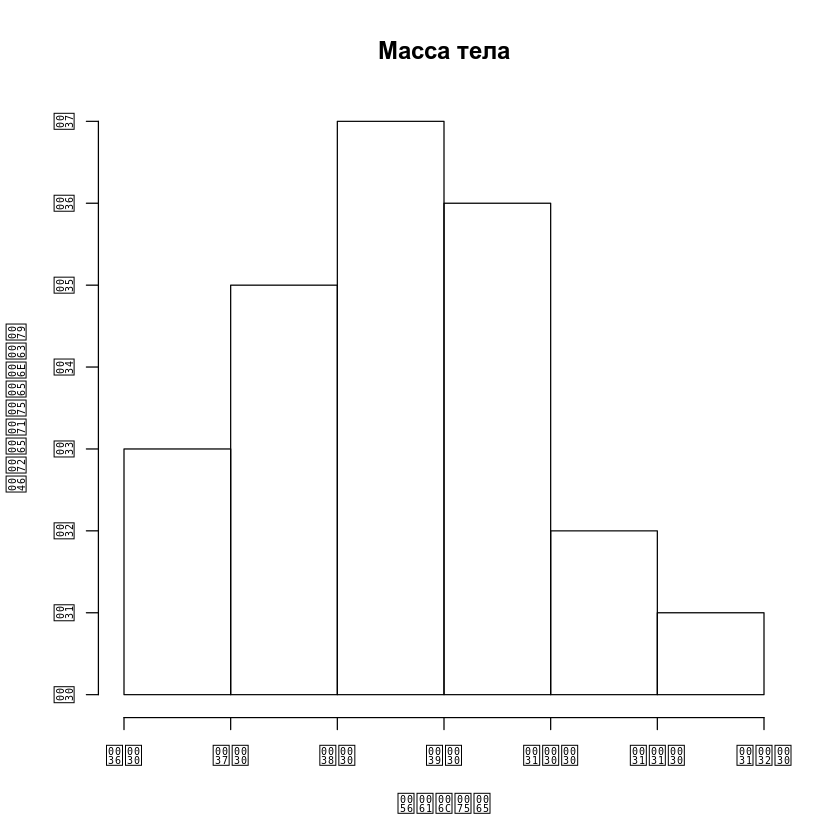

In [24]:
hist(DF$Масса.тела, main = "Масса тела", xlab = "Value")

### 6.	Подготовка результатов
Мы должны собрать результаты в таблицу. Для этого мы могли бы сохранить результаты в отдельные переменные (предпочтительный способ), либо мы можем создать выражение, объединяющее все нужные функции.

Переменная `урвн_гл_итог` будет хранить результаты вычислений для *Уровня глюкозы*:

In [25]:
урвн_гл_итог <- list(
	Переменная = "Уровень глюкозы",
	Размер = length(DF$Уровень.глюкозы), 
	Минимум = min(DF$Уровень.глюкозы), 
	Максимум = max(DF$Уровень.глюкозы),
	Среднее = mean(DF$Уровень.глюкозы), 
	Медиана = median(DF$Уровень.глюкозы), 
	Стд.откл = sd(DF$Уровень.глюкозы), 
	Дисперсия = var(DF$Уровень.глюкозы),
	Ст.ош.ср = DescTools::MeanSE(DF$Уровень.глюкозы), 
	нижн.ДИ = DescTools::MedianCI(DF$Уровень.глюкозы)["lwr.ci"],
	верх.ДИ = DescTools::MedianCI(DF$Уровень.глюкозы)["upr.ci"]
)

Переменная *урвн_гл_итог* является списком пар `tag = value`. *Tag* служит именем для значения *value* и не влияет на вычисления, предоставляя возможность обратиться к конкретному значению по его имени *tag*

Переменная `мт_итог` будет хранить результаты вычислений для *Массы тела*:

In [26]:
мт_итог <- list(
	Переменная = "Масса тела", 
	Размер = length(DF$Масса.тела), 
	Минимум = min(DF$Масса.тела), 
	Максимум = max(DF$Масса.тела), 
	Среднее = mean(DF$Масса.тела), 
	Медиана = median(DF$Масса.тела), 
	Стд.откл = sd(DF$Масса.тела),
	Дисперсия = var(DF$Масса.тела),
	Ст.ош.ср = DescTools::MeanSE(DF$Масса.тела), 
	нижн.ДИ = t.test(DF$Масса.тела)$conf.int[1],
	верх.ДИ = t.test(DF$Масса.тела)$conf.int[2]
)

Итоговый объект типа `data.frame` будет содержать результаты, полученные в ходе объединения переменных выше. Во время объединения обе переменные будут считаться либо строками, либо столбцами. Для объединения переменных как строки, необходимо использовать функцию `rbind`. Для объединения переменных как столбцы, используют функцию `cbind`. 

In [27]:
rbind(урвн_гл_итог,мт_итог)

,Переменная,Размер,Минимум,Максимум,Среднее,Медиана,Стд.откл,Дисперсия,Ст.ош.ср,нижн.ДИ,верх.ДИ
урвн_гл_итог,Уровень глюкозы,24,2,7,3.875,3.5,1.676241,2.809783,0.3421612,3,5
мт_итог,Масса тела,24,68,120,86.29167,83.5,13.31387,177.2591,2.717682,80.66971,91.91362


In [28]:
cbind(урвн_гл_итог,мт_итог)

,урвн_гл_итог,мт_итог
Переменная,Уровень глюкозы,Масса тела
Размер,24,24
Минимум,2,68
Максимум,7,120
Среднее,3.875,86.29167
Медиана,3.5,83.5
Стд.откл,1.676241,13.31387
Дисперсия,2.809783,177.2591
Ст.ош.ср,0.3421612,2.717682
нижн.ДИ,3,80.66971


Сохраните свои вычисления как data.frame

In [29]:
DF_Summary = as.data.frame(cbind(урвн_гл_итог,мт_итог))

С этого момента можно получить доступ к конкретному значению, указав его с помощью символа `$`. Например, для получения верхней границы доверительного интервала массы тела, необходимо выполнить команду `DF_Summary$мт_итог$верх.ДИ`

In [30]:
DF_Summary$мт_итог$верх.ДИ

[1] 91.91362

### Вывод:
*Уровень глюкозы* находится в диапазоне [2; 7] с 95% доверительным интервалом медианы [3; 5] и не подчиняется нормальному распределению. Медианное значение *уровня глюкозы* равно 3,875.
Значения *массы тела* подчиняются нормальному распределению и находятся в диапазоне [68; 120] с 95% доверительным интервалом среднего [80.67; 91.91]. Стандартная ошибка среднего выборки приблизительно в 40 раз ниже среднего, что указывает на тот факт, что данная выборка является репрезентативной по отношению к своей генеральной совокупности.